In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    directory='/gdrive/MyDrive/Risk Prediction/Dataset/Image dataset/Train/',
    target_size=(150,150),
    batch_size=157,
    color_mode='grayscale',
    class_mode='binary',
)

Found 3769 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data=test_datagen.flow_from_directory(
    directory='/gdrive/MyDrive/Risk Prediction/Dataset/Image dataset/Test/',
    target_size=(150,150),
    batch_size=47,
    color_mode='grayscale',
    class_mode='binary'
)

Found 940 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
 tf.keras.layers.MaxPooling2D(2, 2),
 # The second convolution
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # The third convolution
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # Flatten the results to feed into a DNN
 tf.keras.layers.Flatten(),
 # 512 neuron hidden layer
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
 ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow import keras

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=[METRICS])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
 train_generator,
 steps_per_epoch=24,
 epochs=50,
 validation_data=test_data
 )

Epoch 1/50
24/24 [==============================] - 1442s 60s/step - loss: 0.7762 - tp: 2590.0000 - fp: 785.0000 - tn: 100.0000 - fn: 137.0000 - accuracy: 0.7447 - precision: 0.7674 - recall: 0.9498 - auc: 0.5911 - val_loss: 0.5789 - val_tp: 667.0000 - val_fp: 213.0000 - val_tn: 16.0000 - val_fn: 44.0000 - val_accuracy: 0.7266 - val_precision: 0.7580 - val_recall: 0.9381 - val_auc: 0.5249
Epoch 2/50
24/24 [==============================] - 6s 266ms/step - loss: 0.5504 - tp: 2567.0000 - fp: 705.0000 - tn: 170.0000 - fn: 170.0000 - accuracy: 0.7578 - precision: 0.7845 - recall: 0.9379 - auc: 0.6484 - val_loss: 0.5884 - val_tp: 698.0000 - val_fp: 223.0000 - val_tn: 6.0000 - val_fn: 13.0000 - val_accuracy: 0.7489 - val_precision: 0.7579 - val_recall: 0.9817 - val_auc: 0.5607
Epoch 3/50
24/24 [==============================] - 6s 264ms/step - loss: 0.5008 - tp: 2554.0000 - fp: 650.0000 - tn: 224.0000 - fn: 184.0000 - accuracy: 0.7691 - precision: 0.7971 - recall: 0.9328 - auc: 0.7146 - val_

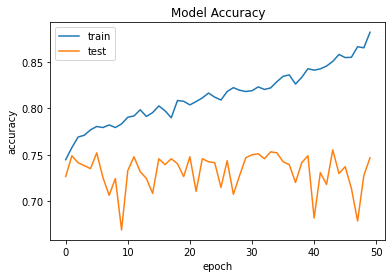

In [ ]:
#plotting the Accuracy of test and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
print('Confusion Matrix')
matrix=[[664,186],[47,43]]
print(matrix)

Confusion Matrix
[[664, 186], [47, 43]]


In [ ]:
import seaborn as sns

[[<matplotlib.axis.YTick at 0x7f42de8757d0>,

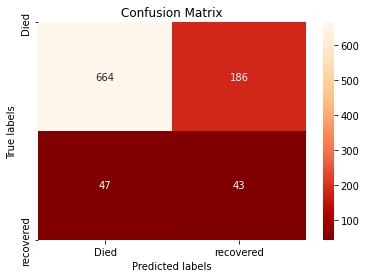

In [ ]:
ax=plt.subplot()
sns.heatmap(matrix,annot=True,ax=ax,cmap='OrRd_r', fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'recovered']); 
ax.yaxis.set_ticklabels(['Died', 'recovered']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])